In [28]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
conn = sqlite3.connect("Sales_data.db")

In [10]:
query="select * from Sales_table limit(20);"

In [11]:
df=pd.read_sql_query(query,conn)

In [12]:
print(df)

             Order Date  Order ID                     Product   Product_ean  \
0   2019-01-22 21:25:00    141234                      iPhone  5.638009e+12   
1   2019-01-28 14:15:00    141235    Lightning Charging Cable  5.563320e+12   
2   2019-01-17 13:33:00    141236            Wired Headphones  2.113973e+12   
3   2019-01-05 20:33:00    141237            27in FHD Monitor  3.069157e+12   
4   2019-01-25 11:59:00    141238            Wired Headphones  9.692681e+12   
5   2019-01-29 20:22:00    141239      AAA Batteries (4-pack)  2.953869e+12   
6   2019-01-26 12:16:00    141240      27in 4K Gaming Monitor  5.173671e+12   
7   2019-01-05 12:04:00    141241        USB-C Charging Cable  8.051737e+12   
8   2019-01-01 10:30:00    141242  Bose SoundSport Headphones  1.508418e+12   
9   2019-01-22 21:20:00    141243    Apple Airpods Headphones  1.386344e+12   
10  2019-01-07 11:29:00    141244    Apple Airpods Headphones  4.332899e+12   
11  2019-01-31 10:12:00    141245          Macbook P

## Total Qunatity and Total Revenue by product 


In [14]:
TQ_TR = """
SELECT 
    Product, 
    SUM("Quantity Ordered") AS total_quantity, 
    SUM("Quantity Ordered" * "Price Each") AS revenue
FROM sales_table
GROUP BY Product
ORDER BY revenue DESC
LIMIT 10;
"""

df = pd.read_sql_query(TQ_TR, conn)
print("Total sales and Total revenue",df)

Total sales and Total revenue                       Product  total_quantity     revenue
0          Macbook Pro Laptop            4728  8037600.00
1                      iPhone            6849  4794300.00
2             ThinkPad Laptop            4130  4129958.70
3                Google Phone            5532  3319200.00
4      27in 4K Gaming Monitor            6244  2435097.56
5      34in Ultrawide Monitor            6199  2355558.01
6    Apple Airpods Headphones           15661  2349150.00
7               Flatscreen TV            4819  1445700.00
8  Bose SoundSport Headphones           13457  1345565.43
9            27in FHD Monitor            7550  1132424.50


## total_quantity_sold_byproduct

In [ ]:
total_quantity_sold_byproduct = pd.read_sql_query(
	"SELECT Product, SUM(\"Quantity Ordered\") AS total_sold FROM sales_table GROUP BY Product ORDER BY total_sold DESC;",
	conn
)

print(total_quantity_sold_byproduct)

                       Product  total_sold
0       AAA Batteries (4-pack)       31017
1        AA Batteries (4-pack)       27635
2         USB-C Charging Cable       23975
3     Lightning Charging Cable       23217
4             Wired Headphones       20557
5     Apple Airpods Headphones       15661
6   Bose SoundSport Headphones       13457
7             27in FHD Monitor        7550
8                       iPhone        6849
9       27in 4K Gaming Monitor        6244
10      34in Ultrawide Monitor        6199
11                Google Phone        5532
12               Flatscreen TV        4819
13          Macbook Pro Laptop        4728
14             ThinkPad Laptop        4130
15                20in Monitor        4129
16             Vareebadd Phone        2068
17          LG Washing Machine         666
18                    LG Dryer         646


## Monthly Revenue Trend

In [24]:
monthly_revenue_trend = pd.read_sql_query(
    'SELECT SUBSTR("Order Date", 1, 7) AS month, SUM("Quantity Ordered" * "Price Each") AS monthly_revenue FROM sales_table GROUP BY month ORDER BY month;',
    conn
)
print(monthly_revenue_trend)

      month  monthly_revenue
0   2019-01       1813586.44
1   2019-02       2202022.42
2   2019-03       2807100.38
3   2019-04       3390670.24
4   2019-05       3152606.75
5   2019-06       2577802.26
6   2019-07       2647775.76
7   2019-08       2244467.88
8   2019-09       2097560.13
9   2019-10       3736726.88
10  2019-11       3199603.20
11  2019-12       4613443.34
12  2020-01          8670.29


## Profitability by Product (Total Profit and Cost)

In [27]:
profit_by_product = pd.read_sql_query(
    '''SELECT 
    Product,
    SUM("Quantity Ordered" * "Cost price") AS total_cost,
    SUM("Quantity Ordered" * "Price Each") AS total_revenue,
    SUM(margin) AS total_margin
FROM sales_table
GROUP BY Product
ORDER BY total_margin DESC;''',
conn

)
print(profit_by_product)

                       Product    total_cost  total_revenue  total_margin
0           Macbook Pro Laptop  2.652408e+06     8037600.00  5.385192e+06
1                       iPhone  1.582119e+06     4794300.00  3.212181e+06
2              ThinkPad Laptop  1.362886e+06     4129958.70  2.767072e+06
3                 Google Phone  1.095336e+06     3319200.00  2.223864e+06
4       27in 4K Gaming Monitor  8.035822e+05     2435097.56  1.631515e+06
5       34in Ultrawide Monitor  7.773341e+05     2355558.01  1.578224e+06
6                Flatscreen TV  4.770810e+05     1445700.00  9.686190e+05
7     Apple Airpods Headphones  1.526948e+06     2349150.00  8.222025e+05
8   Bose SoundSport Headphones  6.727827e+05     1345565.43  6.727827e+05
9              Vareebadd Phone  2.729760e+05      827200.00  5.542240e+05
10            27in FHD Monitor  7.360759e+05     1132424.50  3.963486e+05
11          LG Washing Machine  1.318680e+05      399600.00  2.677320e+05
12                    LG Dryer  1.2790

In [29]:
conn.close()

## Bar Chart: Revenue by Product 

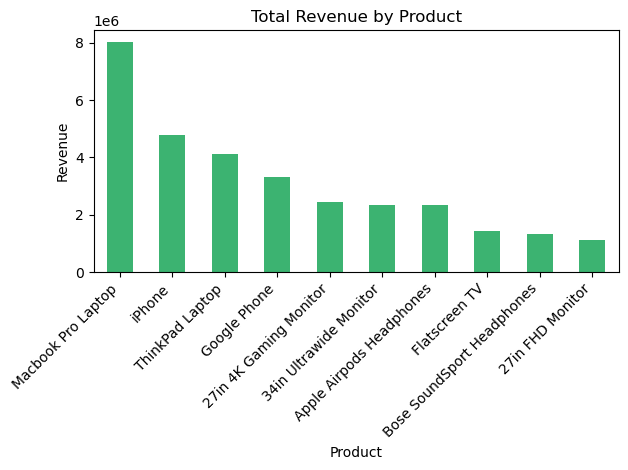

In [30]:
df.plot(kind='bar', x='Product', y='revenue', legend=False, color='mediumseagreen')
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("revenue_by_product.png")
plt.show()


##  Total Quantity Sold by Product

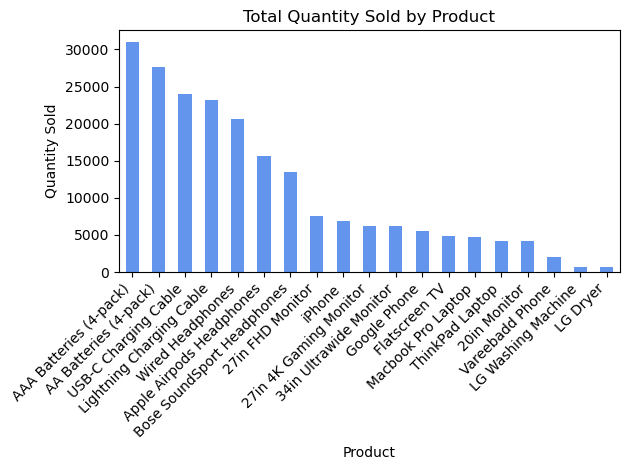

In [33]:
total_quantity_sold_byproduct.plot(kind='bar', x='Product', y='total_sold', legend=False, color='cornflowerblue')
plt.title('Total Quantity Sold by Product')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("quantity_by_product.png")
plt.show()


## Monthly Revenue Trend

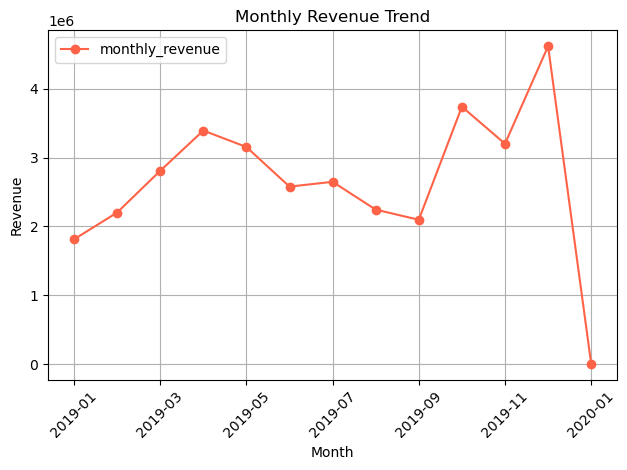

In [35]:
monthly_revenue_trend.plot(kind='line', x='month', y='monthly_revenue', marker='o', linestyle='-', color='tomato')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("monthly_revenue_trend.png")
plt.show()


## Total Profit by Product

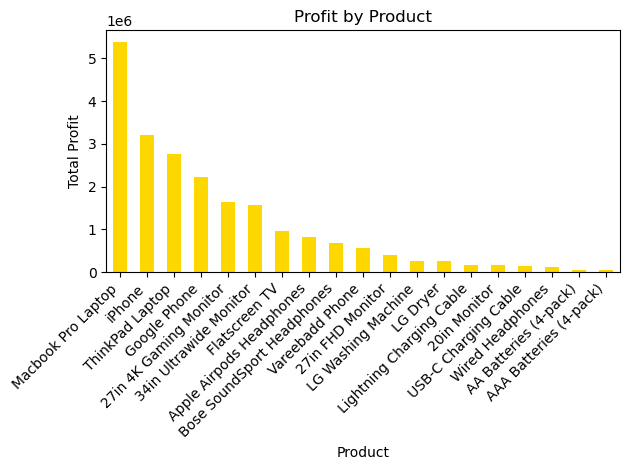

In [37]:
profit_by_product.plot(kind='bar', x='Product', y='total_margin', legend=False, color='gold')
plt.title('Profit by Product')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("profit_by_product.png")
plt.show()
